In [66]:
#Importing the libraries
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [67]:
df = pd.read_csv("messages.csv",encoding='latin-1') # After Using 3 different datasets this is the best one

In [68]:
df.head(10)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [69]:
df.columns

Index(['subject', 'message', 'label'], dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [71]:
#Null values Check and elimantion 
df.isnull().values.any()
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

A quick observation 62 row are missing in the subject columns that means 62 emails are without subject heading. 
 Here, not dropping Nan rows for subject column as it of (no use in building model.)

In [72]:
#Checking total number of mails
print("Count of label:\n",df['label'].value_counts())

Count of label:
 0    2412
1     481
Name: label, dtype: int64


1 = Spam / 0 = Not spam binary use 

In [73]:
#Checking the Ratio of labels

print("Spam Email Ratio that is 1 label:",round(len(df[df['label']==1])/len(df['label']),2)*100,"%")

Spam Email Ratio that is 1 label: 17.0 %


In [111]:
df['length'] = df.message.str.len()
df.tail(20)

,subject,message,label,length,clean_length
2873,parsers for russian,query also posted seelangs apologies advance r...,0,472,472
2874,case studies needed,dear colleagues preparing teach introductory c...,0,755,755
2875,"re : 8 . 1107 , qs : lang . games , "" democrat...",dear mr ungar us congress incorrect noun modif...,0,764,764
2876,indoeuropean courses listed by universities ( ...,titus project indogermanische gesellschaft pre...,0,159,159
2877,job : indonesian / asian studies,lecturer indonesian asian studies ref anumbr n...,0,1844,1844
2878,"re : 6 . 797 , comparative method : n - ary co...",critics manaster ramer miss main point janhune...,0,524,524
2879,summary : heavy onsets references,original query,0,14,14
2880,sum master 's dissertation,dear netters week ago asked help locating pete...,0,646,646
2881,internships in israel,recently moved israel studying tel aviv univer...,0,388,388
2882,accept credit cards and watch sales skyrocket !,increase online sales numbr http numbr ut merc...,1,1463,1463


In [75]:
#Converting all messages to lower case
df['message'] = df['message'].str.lower()
df.head()
# Easier for the model 

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2857
1,NaN,"lang classification grimes , joseph e . and ba...",0,1801
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1436
3,risk,a colleague and i are researching the differin...,0,325
4,request book information,earlier this morning i was on the phone with a...,0,1047


In [76]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
    
# Replace numeric characters with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [77]:
# Remove punctuation # From GEEKSFORGEEKS
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [78]:
df.head()
# Clean and easy for the model 

,subject,message,label,length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2857
1,NaN,lang classification grimes joseph e and barbar...,0,1801
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1436
3,risk,a colleague and i are researching the differin...,0,325
4,request book information,earlier this morning i was on the phone with a...,0,1047


In [79]:
#Removing the stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [80]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2857,2179
1,NaN,lang classification grimes joseph e barbara f ...,0,1801,1454
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1436,1064
3,risk,colleague researching differing degrees risk p...,0,325,210
4,request book information,earlier morning phone friend mine living south...,0,1047,629


In [81]:
#Total length removal
print("Original Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Original Length: 9347636
Cleaned Length: 6767857
Total Words Removed: 2579779


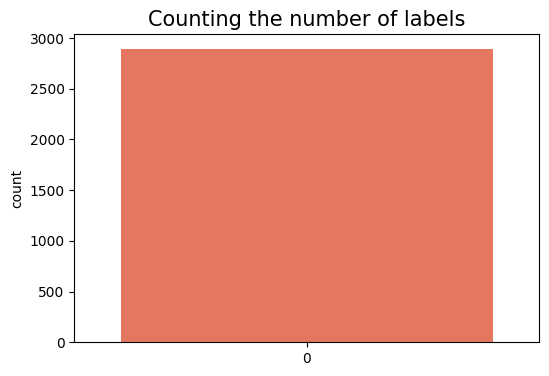

0    2412
1     481
Name: label, dtype: int64


In [82]:
#Graphical Visualisation for counting number of labels.
plt.figure(figsize=(6,4))
sns.countplot(df['label'],palette= 'Reds')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(df.label.value_counts())

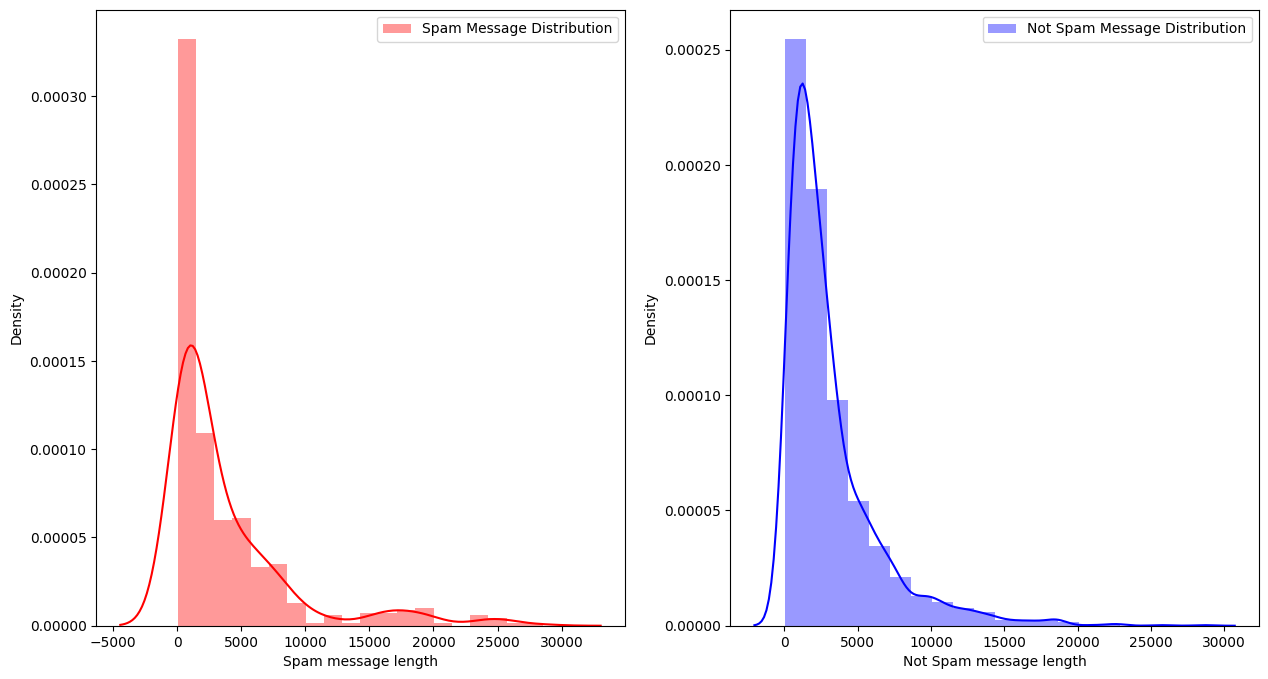

In [83]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='b')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()

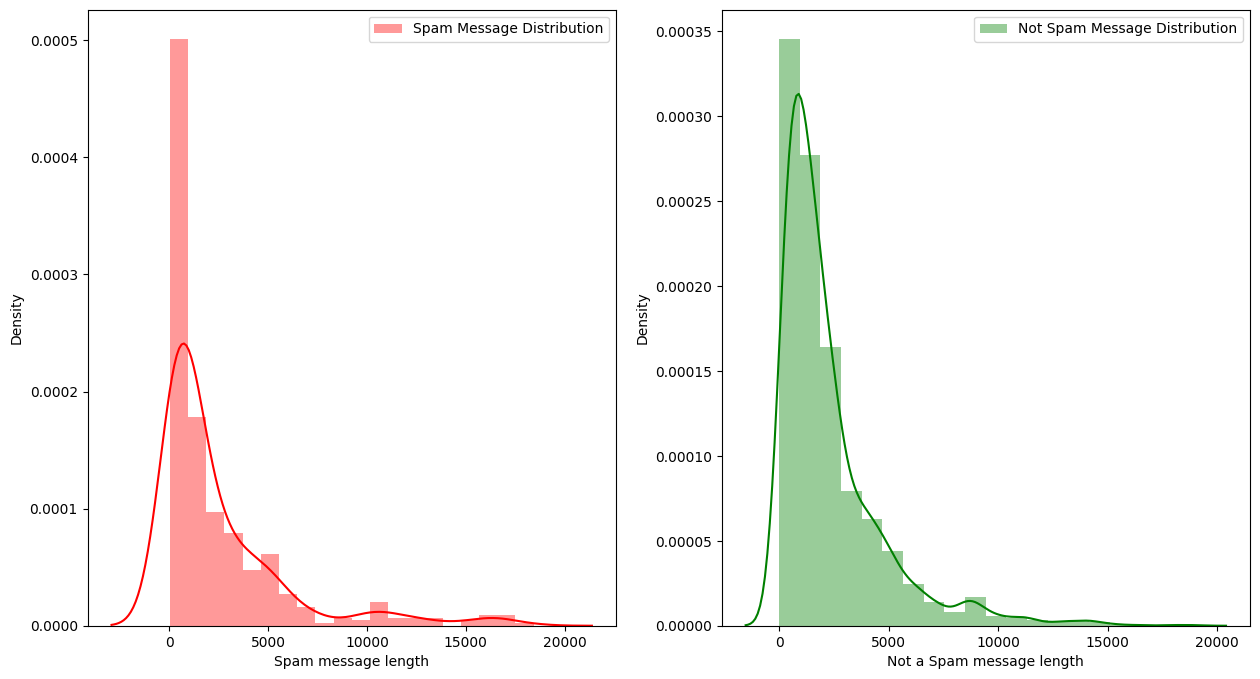

In [84]:
#Message distribution after cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='g')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()

plt.show()

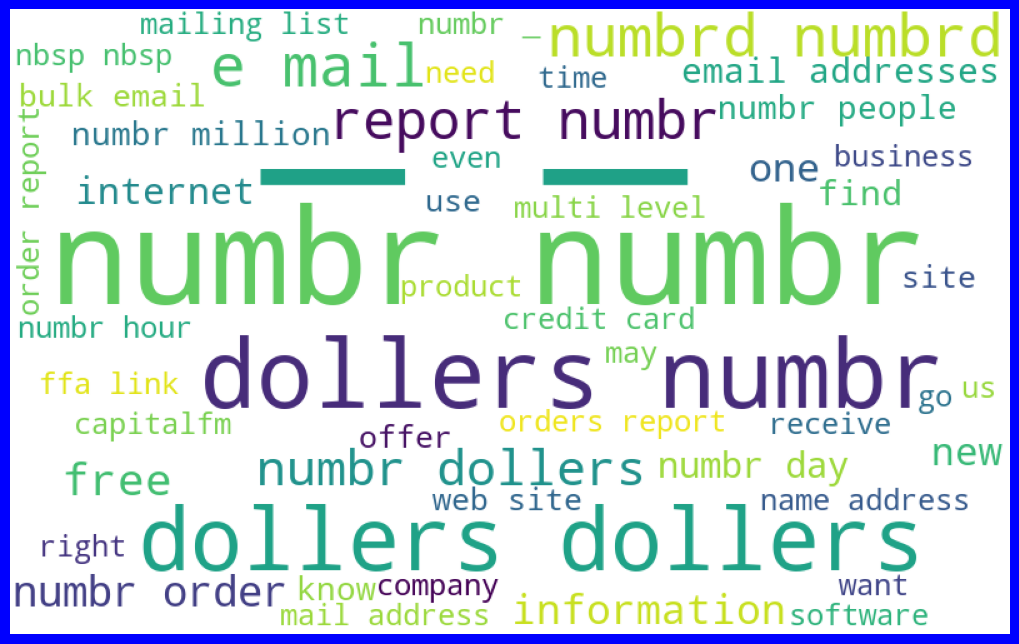

In [85]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

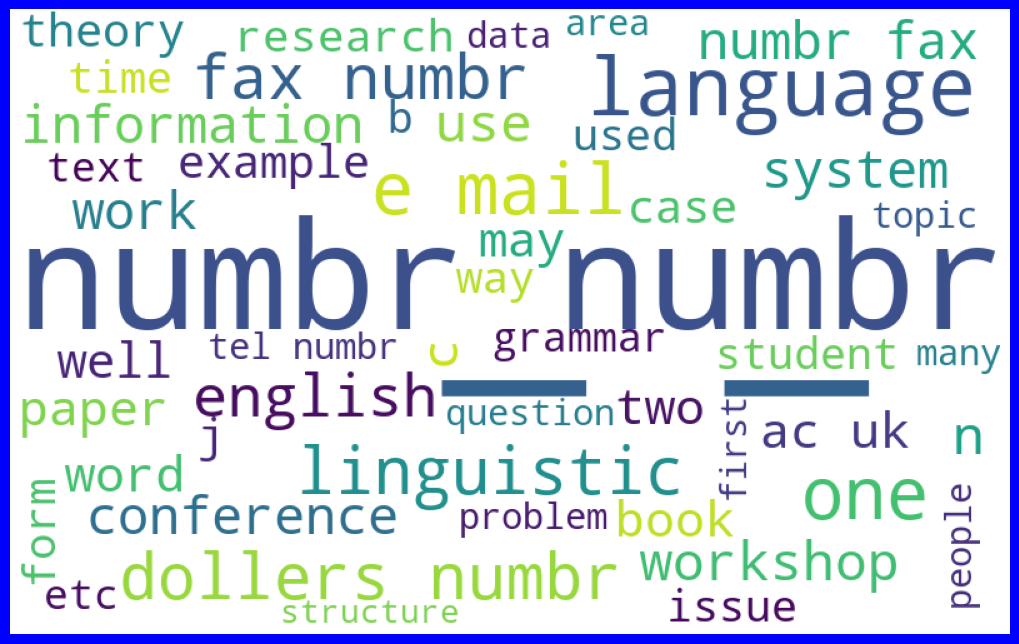

In [86]:
#Getting sense of loud words in not-spam 
from wordcloud import WordCloud

not_spams = df['message'][df['label']==0]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [87]:
tf_vec = TfidfVectorizer()

#naive = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']

In [88]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)         #test_size=0.20 random_state=42 test_size=0.15

#naive.fit(X_train,Y_train)
#y_pred= naive.predict(x_test)

SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9875690607734806


In [89]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [90]:
X_train

<2169x54998 sparse matrix of type '<class 'numpy.float64'>'
	with 382216 stored elements in Compressed Sparse Row format>

In [91]:
# Checking Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.94      0.97       139

    accuracy                           0.99       724
   macro avg       0.99      0.97      0.98       724
weighted avg       0.99      0.99      0.99       724



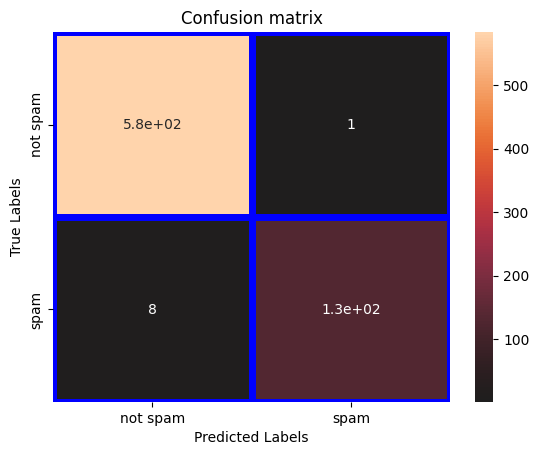

In [92]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='b',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

### In naive_bayes the accuracy score was in between 83 to 88 % & in SVM the    accuracy score is around 98%.

### From both models we see SVM performs better than naive_bayes .

### Saving SVM as our final model.

In [93]:
#We see SVM to perform the best.
#save the best model.
# import pickle
# filename='Email_spam_detect.pkl'
# M=open(filename,'wb')
# pickle.dump(SVM,M)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
# M.close()



### Final Pipeline

In [94]:
from sklearn.pipeline import Pipeline

In [95]:
X = df[['message']]
y = df['label']

In [96]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42) 

In [97]:
pipe = Pipeline([('vectorizer', TfidfVectorizer()),
    ('svc', SVC(C=1.0, kernel='linear', degree=3 , gamma='auto'))])

In [98]:
X_train

,message
2793,hi program generates bizarre poetry accompanyi...
630,please post following book ladd robert univers...
2411,pintzuk susan phrase structures competition va...
1392,call participation logic course internet dynam...
1114,dear fellow linguists student graduate institu...
...,...
1638,read robert f barsky reply postal pullum comme...
1095,need help translation french word barine conte...
1130,dear world ago asked help compiling list books...
1294,language instruction _ _ _ _ _ _ _ _ _ _ _ _ _...


In [99]:
pipe.fit(X_train['message'],Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

In [100]:

y_pred = pipe.predict(x_test['message'])

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9930939226519337


In [101]:
pipe.predict(np.array([["This is a scam 100%"]])[0])


array([0], dtype=int64)

In [102]:
import pickle
filename= "model.pkl"
with open(filename, 'wb') as fout:
    pickle.dump(pipe,fout)

In [103]:
import numpy as np
from flask import Flask, request, jsonify
import pickle

In [104]:
app = Flask(__name__)
model = pickle.load(open('Email_spam_detect.pkl','rb'))

In [105]:
@app.route('/api',methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([[np.array(data['exp'])]])
    output = prediction[0]
    return jsonify(output)

In [106]:
if __name__ == '__main__':
    app.run(port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [ ]:
# Import libraries
import numpy as np
from flask import Flask, request, jsonify
import pickle
app = Flask(__name__)
# Load the model
model = pickle.load(open('Email_spam_detect.pkl','rb'))
@app.route('/api',methods=['POST'])
def predict():
    # Get the data from the POST request.
    data = request.get_json(force=True)
    # Make prediction using model loaded from disk as per the data.
    prediction = model.predict([[np.array(data['exp'])]])
    # Take the first value of prediction
    output = prediction[0]
    return jsonify(output)
if __name__ == '__main__':
    app.run(port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1